# 1 Author

**Student Name**:  Syed Farhan Haider

**Student ID**:  230797682



# 2 Problem formulation

Utilizing the MLEnd Yummy Dataset, develop a machine learning pipeline designed to take a photo of a dish predict whether the image features indicate whether the dish is veg(vegetarian/vegan), or non-veg.

The interesting aspect of this problem lies in its real-world applicability and potential impact on dietary choices. By leveraging the MLEnd Yummy Dataset and creating a machine learning pipeline, the model aims to analyze image features of dishes and classify them into categories such as veg (vegetarian/vegan) or non-veg. This has practical implications for individuals with specific dietary preferences or restrictions, facilitating a more informed decision-making process when choosing meals. The intersection of computer vision and dietary choices makes this problem intriguing, with the potential to enhance user experiences in food-related applications and services.

# **3 Machine Learning pipeline**


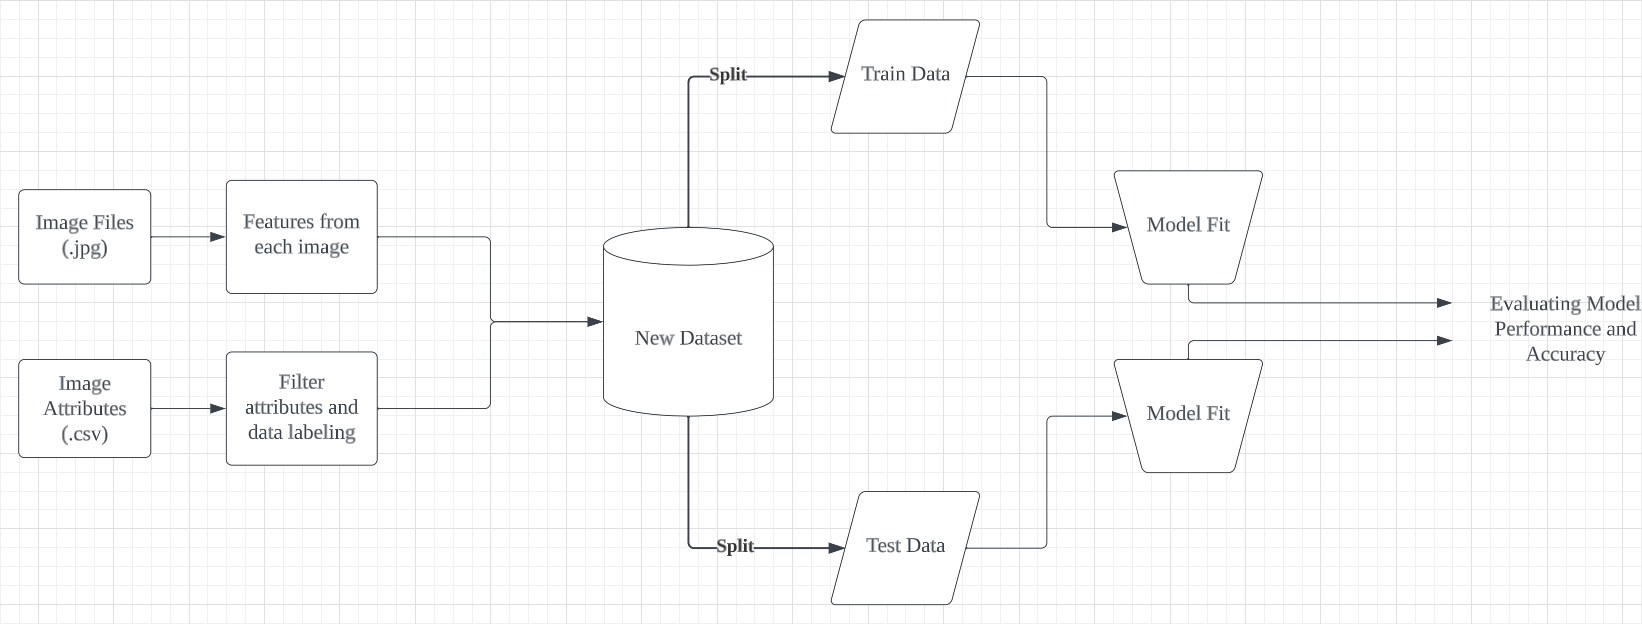

The machine learning pipeline involves the following stages:

**a. Data Download and Preprocessing:** Downloading the MLEnd Yummy Dataset, filtering the data by excluding the only filename and Diet attributes and splitting the dataset into training and testing sets.

**b. Image Processing:** Resizing and standardizing the images to create the input for the machine learning models.

**c. Feature Extraction:** Extracting features from the images, including the yellow component, color histograms, and GMLC features.

**d. Model Training:** Training machine learning models (Linear SVM, Logistic Regression, Convolutional Neural Network) using the extracted features.

**e. Evaluation:** Evaluating the models on both the training and testing sets to assess their accuracy.

# 4 Transformation stage

###**Data Download and Preprocessing:**

In [1]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [2]:
# Importing the necessary libraries
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

Downloading the labeled data from the drive. This dataset contains the images that contain all types of diet.

In [4]:
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

Now let's check the contents of the folder

In [5]:
os.listdir(baseDir)

['MLEndYD_images_small',
 'MLEndYD_images',
 'MLEndYD_image_attributes_small.csv',
 'MLEndYD_image_attributes_benchmark.csv']

For this project we will use the larger dataset.
Let's create a dataframe using the benchmark csv and take a look at the contents.

In [6]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


As our focus is to take images and predict whether the diet is veg, non-veg, or vegan, let's filter out the dataset with only Diet and Benchmark_A.

In [7]:
import pandas as pd

# Filtering the columns
filtered_df = MLENDYD_df[['Diet','Benchmark_A']]

Let's display the data and see whether the required action is fulfilled.

In [8]:
filtered_df

,Diet,Benchmark_A
filename,,
000001.jpg,non_vegetarian,Train
000002.jpg,non_vegetarian,Train
000003.jpg,non_vegetarian,Train
000004.jpg,vegetarian,Train
000005.jpg,non_vegetarian,Train
...,...,...
003246.jpg,vegetarian,Train
003247.jpg,vegetarian,Test
003248.jpg,vegetarian,Test


This is the desired dataset that we have to use for our model. Notice that we have ignored the irrelevant columns for our solution.

A total of 3250 dishes found that are either veg (or vegan), non-veg.

Lets check first and last image from our new dataset and get some insights.

(-0.5, 1487.5, 1160.5, -0.5)

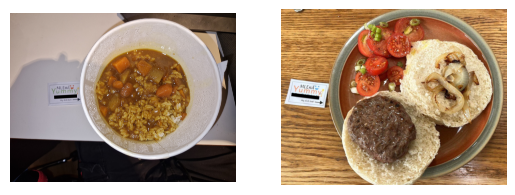

In [9]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/003250.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

We have two delicacies here and by our eyes we can depict that both seem to be non-veg.

Let's map the Diet column as 0 for vegan/vegetarian, and 1 for non-veg.

In [10]:
diet_mapping = {'vegetarian': 0, 'vegan': 0, 'non_vegetarian': 1}

# Creating a new column 'Diet_Code' based on the mapping
filtered_df['Diet_Code'] = filtered_df['Diet'].map(diet_mapping)

Let's check out the output

In [11]:
filtered_df

,Diet,Benchmark_A,Diet_Code
filename,,,
000001.jpg,non_vegetarian,Train,1
000002.jpg,non_vegetarian,Train,1
000003.jpg,non_vegetarian,Train,1
000004.jpg,vegetarian,Train,0
000005.jpg,non_vegetarian,Train,1
...,...,...,...
003246.jpg,vegetarian,Train,0
003247.jpg,vegetarian,Test,0
003248.jpg,vegetarian,Test,0


Let's count the no. of veg and non-veg dishes to identify if there is an imbalance.

In [12]:
Veg = len(filtered_df[filtered_df['Diet_Code']==0])
NonVeg = len(filtered_df[filtered_df['Diet_Code']==1])

print("No. of Veg dishes = ", Veg)
print("No. of NonVeg dishes = ", NonVeg)


No. of Veg dishes =  1642
No. of NonVeg dishes =  1608


Great! That's nearly a balanced dataset.

Let's split data into TrainSet and TestSet using the Benchmark_A column.

In [13]:
# Creating a mask using Benchmark_A column

mask_train = filtered_df['Benchmark_A'] == 'Train'

We will now split the dataset based on the mask. Note that we will ignore every column but the filename and label as only these are required for our solution.

In [14]:
# Splitting the data based on the mask.

TrainSet = pd.DataFrame(filtered_df[mask_train])
TestSet = pd.DataFrame(filtered_df[~mask_train])

Let's add X_paths that will contain the path of each corresponding image in the dataset. This way our model can access the images.

In [15]:
TrainSet['X_paths'] = "/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/"+TrainSet.index
TestSet['X_paths'] = "/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/"+TestSet.index

In [16]:
TrainSet.head()

,Diet,Benchmark_A,Diet_Code,X_paths
filename,,,,
000001.jpg,non_vegetarian,Train,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000002.jpg,non_vegetarian,Train,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000003.jpg,non_vegetarian,Train,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000004.jpg,vegetarian,Train,0,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000005.jpg,non_vegetarian,Train,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...


In [17]:
TestSet.head()

,Diet,Benchmark_A,Diet_Code,X_paths
filename,,,,
000006.jpg,non_vegetarian,Test,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000007.jpg,non_vegetarian,Test,1,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000010.jpg,vegetarian,Test,0,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000014.jpg,vegetarian,Test,0,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...
000016.jpg,vegan,Test,0,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...


Our dataset is now ready to be used. Let's save the predictors and labels of the training and test dataset:

In [18]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Diet_Code']
Y_test  = TestSet['Diet_Code']

Let's visualise the images that we have extracted.

Veg


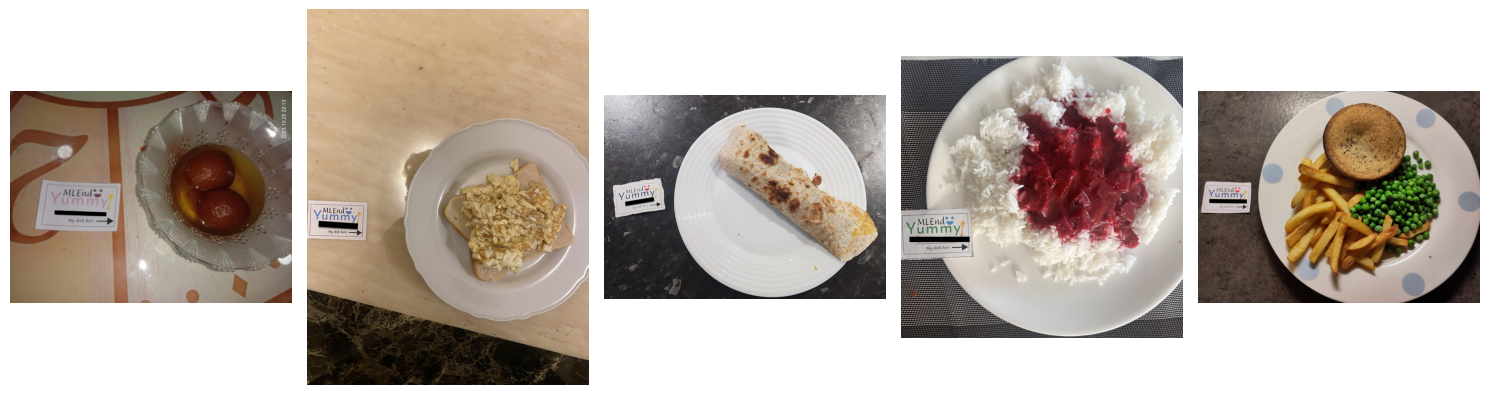

NonVeg


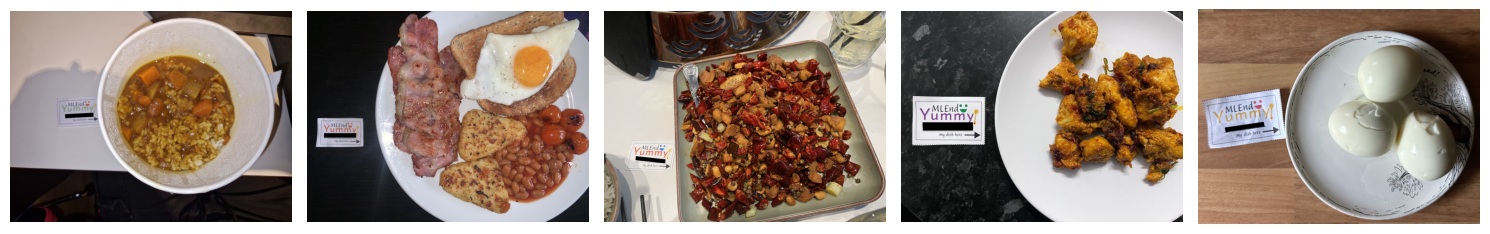

In [19]:
Veg_Img = np.array(X_train_paths)[Y_train==0]
NonVeg_Img = np.array(X_train_paths)[Y_train==1]

print('Veg')
plt.figure(figsize=(15,5))
for k,file in enumerate(Veg_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('NonVeg')
plt.figure(figsize=(15,5))
for k,file in enumerate(NonVeg_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

As expected, we can clearly notice the dishes being Veg or NonVeg have been segregated accordingly.

###**Image Processing**

Since the images are of different sizes, let's resize the images. To keep the aspect ratio of image as it is, we will append black color on each side so that images are squared and then we will resize them to 200x200 pixels.

In [20]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(int((N-M)/2), int((N-M)/2))], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(int((M-N)/2), int((M-N)/2)),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

Let's now create arrays of images to be used in training and testing respectively.

In [21]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|2275\2275|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|975\975|
Done!


((2275, 200, 200, 3), (975, 200, 200, 3))

Let's now plot a few images after resizing:

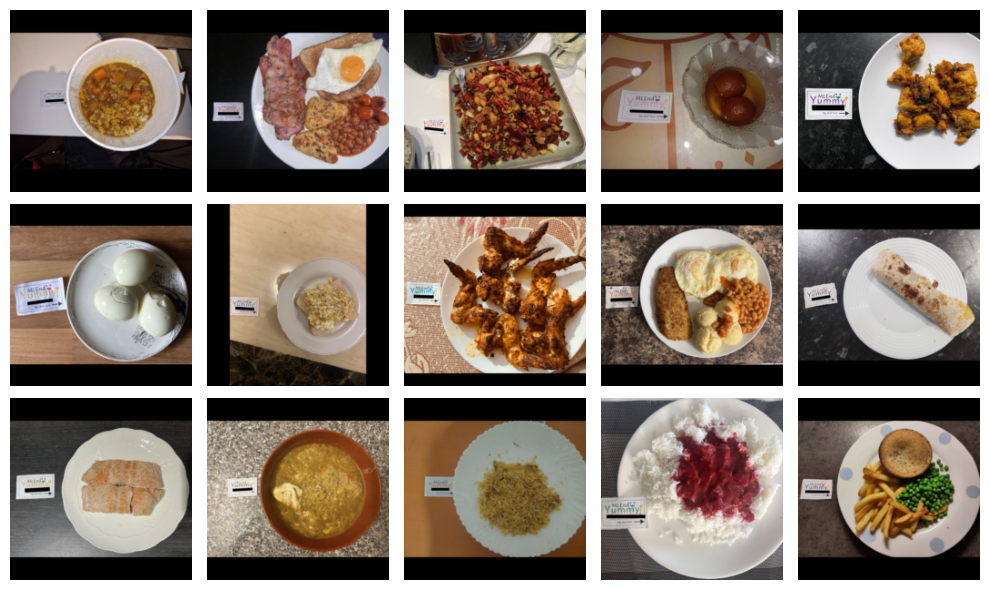

In [22]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

### **Feature Extraction:**

 Each photo is described by 3 x 200 x 200 = 120,000 values. Therefore, the predictor space has 120,000 dimensions. Let's reduce the dimensionality of the predictor space by feature extraction. Feature extraction is a common approach that allows us to reduce the dimensionality of our prediction space.

---
#### Followong are the feature extraction functions used in this project:

####**1. get_yellow_component(I, t1=27, t2=33):**

Input: Takes an RGB image I and optional threshold values t1 and t2.

Output: Returns the number of yellow pixels in the image that fall within the specified hue range defined by t1 and t2.


####**2. GMLC_features(I):**

Input: Takes an RGB image I.

Output: Computes and returns two texture features (f1 and f2) using the Gray-Level Co-occurrence Matrix (GLCM). Specifically, it calculates the dissimilarity and correlation features.


####**3. HOG_features(I):**

Input: Takes an RGB image I.

Output: Computes Histogram of Oriented Gradients (HOG) features from the grayscale version of the input image. Returns the computed HOG features.

In [23]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

In [24]:
def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

In [25]:
from skimage.feature import hog
from skimage import exposure

def HOG_features(I):
    I_gray = rgb2gray(I)
    features, hog_image = hog(I_gray, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True)
    return features

Also, let's create a function to plot the confusion matrix of the outcome.

In [50]:
def showConfMat(CM, labels = ['Veg','NonVeg']):
  plt.matshow(CM,cmap='Greens')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

#**5 Modelling**



Using three machine learning models:

Linear SVM: A linear Support Vector Machine model.

>Linear SVM is particularly effective when the classes are linearly separable or nearly separable. It works well in high-dimensional spaces, making it suitable for tasks where the number of features is relatively large compared to the number of samples.

Logistic Regression: A logistic regression model.

> Logistic Regression is a versatile algorithm suitable for binary classification tasks. It works well when the relationship between the features and the target variable is approximately linear.

CNN Model: Convolutional Neural Networks

> CNNs are especially powerful for image classification tasks. They automatically learn hierarchical features from raw pixel values, capturing spatial hierarchies in the data. They excel in tasks where the relationships between features are complex and non-linear.

We will compare the performance of each model and pick the best one.

#**6 Methodology**

The models are trained and evaluated using accuracy as the performance metric. The dataset is preprocessed to handle class imbalance, and feature extraction is performed using image processing techniques. The pipeline includes steps for data preprocessing, image processing, feature extraction, model training, and evaluation.

#**7 Dataset**

Let us now extract the three features from each image and create the transform sets X_train_f and X_test_f:

In [28]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

After formatting both X_train_f and X_test_f as numpy arrays, we can check their respective shapes:

In [29]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((2275, 3), (975, 3))

As we can see here, the dimensionality of our dataset has been reduced from 120000D to 3D.

Let's implement a normalisation stage to ensure that the 3 attributes in the new prediction space take on a similar range of values. We will implement standardisation.

In [30]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

###**Model Training:**

Let's implement SVM and train our model.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

LinearSVC(C=1)

In [32]:
ytp_yg_svm = model.predict(X_train_fn)
ysp_yg_svm = model.predict(X_test_fn)

train_accuracy = np.mean(ytp_yg_svm==Y_train)
test_accuracy  = np.mean(ysp_yg_svm==Y_test)

print('Training Accuracy:',train_accuracy)
print('Test  Accuracy:',test_accuracy)

Training Accuracy: 0.5652747252747252
Test  Accuracy: 0.5661538461538461


As displayed above, the accuracy is not that good. Let's implement another model (Logistic Regression) and see if there is any improvement.

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_fn,Y_train)
acc_log = round(logreg.score(X_train_fn, Y_train) * 100, 2)
acc_log

56.57

In [34]:
ytp_yg_lr = logreg.predict(X_train_fn)
ysp_yg_lr = logreg.predict(X_test_fn)

print('Training Accuracy:', np.mean(ytp_yg_lr==Y_train))
print('Test  Accuracy:', np.mean(ysp_yg_lr==Y_test))

Training Accuracy: 0.5657142857142857
Test  Accuracy: 0.5651282051282052


The accuracies are nearly same.

Let's try to improve the accuracy by considering one more feature extraction Histogram of Oriented Gradients (HOG). HOG is a popular feature descriptor for object detection. It captures the local intensity gradients in different directions.

Let's repeat the process and create a new training and test image sets and observe the accuracies. Note that we will extract 4 HOG features which will make the Dataset to 7D.

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Extracting features for each image in the training set
X_train_f = []
for I in X_train:
    f1 = HOG_features(I)
    f2, f3 = GMLC_features(I)
    f4 = get_yellow_component(I)

    # Concatenate features along one axis (axis=0 in this case)
    features = np.concatenate([f1[:4], [f2, f3, f4]])

    X_train_f.append(features)

# Extracting features for each image in the test set
X_test_f = []
for I in X_test:
    f1 = HOG_features(I)
    f2, f3 = GMLC_features(I)
    f4 = get_yellow_component(I)

    # Concatenate features along one axis (axis=0 in this case)
    features = np.concatenate([f1[:4], [f2, f3, f4]])

    X_test_f.append(features)

# Converting the lists to numpy arrays
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)

# Computing mean and standard deviation using NumPy
MEAN = np.mean(X_train_f, axis=0)
SD = np.std(X_train_f, axis=0)

# Applying StandardScaler
X_train_fn = (X_train_f - MEAN) / SD
X_test_fn = (X_test_f - MEAN) / SD

Let's get the accuracies both by SVM and Logistic Regression Model for this combination.

In [47]:
print("Using HOG feature along with GMLC and Yellow Component\n")

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

ytp_ygh_svm = model.predict(X_train_fn)
ysp_ygh_svm = model.predict(X_test_fn)

train_accuracy = np.mean(ytp_ygh_svm==Y_train)
test_accuracy  = np.mean(ysp_ygh_svm==Y_test)

print('SVM Model:')
print('Training Accuracy: ',train_accuracy)
print('Test  Accuracy: ',test_accuracy)

logreg = LogisticRegression()
logreg.fit(X_train_fn,Y_train)
acc_log = round(logreg.score(X_train_fn, Y_train) * 100, 2)
acc_log

ytp_ygh_lr = logreg.predict(X_train_fn)
ysp_ygh_lr = logreg.predict(X_test_fn)

print('------------------------')
print('Logistic Regression Model:')
print('Training Accuracy', np.mean(ytp_ygh_lr==Y_train))
print('Test  Accuracy', np.mean(ysp_ygh_lr==Y_test))

Using HOG feature along with GMLC and Yellow Component

SVM Model:
Training Accuracy:  0.5679120879120879
Test  Accuracy:  0.5692307692307692
------------------------
Logistic Regression Model:
Training Accuracy 0.567032967032967
Test  Accuracy 0.5712820512820512


Now that we have observed the performance of SVM and Logistic Regression Model, let's know train the CNN, the most complex and identify whether it is suitable for our dataset.

Data Preparation:

>We will use one-hot encoding to convert the categorical labels (Y_train and Y_test) into binary vectors. We have already assigned the labels to Y_train and Y_test earlier. This is a common step for training a model with categorical labels.

Model Architecture:

>The model is a sequential model.

>Let's start the model with a 2D convolutional layer with 32 filters and a (3, 3) kernel, using ReLU activation, and specifying the input shape as (200, 200, 3).

>This is will followed by max-pooling layers to downsample the spatial dimensions.

>Two more convolutional layers follow the same pattern.

>After the convolutional layers, the model flattens the output into a 1D array and adds a dense layer with 64 units and ReLU activation.


>The final layer is a dense layer with 2 units (for binary classification) and softmax activation.

Model Compilation:

>The model is compiled with the Adam optimizer, categorical cross-entropy loss (suitable for multi-class classification), and accuracy as the evaluation metric.

Model Training:

>The model is trained on the training data (X_train and Y_train) for 10 epochs with a batch size of 32. The validation data is specified using validation_split, which takes 20% of the training data for validation.

Model Evaluation:

>The trained model is evaluated on the test data (X_test and Y_test), and the test accuracy is printed.

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Converting the labels labels to one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # 2 classes: veg and non-veg

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model using accuracy as the metric
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
57/57 [==============================] - 149s 3s/step - loss: 0.7694 - accuracy: 0.5055 - val_loss: 0.6893 - val_accuracy: 0.5560
Epoch 2/10
57/57 [==============================] - 152s 3s/step - loss: 0.6902 - accuracy: 0.5324 - val_loss: 0.6851 - val_accuracy: 0.5099
Epoch 3/10
57/57 [==============================] - 151s 3s/step - loss: 0.6825 - accuracy: 0.5731 - val_loss: 0.6923 - val_accuracy: 0.5319
Epoch 4/10
57/57 [==============================] - 141s 2s/step - loss: 0.6575 - accuracy: 0.6104 - val_loss: 0.6827 - val_accuracy: 0.5692
Epoch 5/10
57/57 [==============================] - 147s 3s/step - loss: 0.6117 - accuracy: 0.6769 - val_loss: 0.7233 - val_accuracy: 0.5626
Epoch 6/10
57/57 [==============================] - 143s 3s/step - loss: 0.5472 - accuracy: 0.7187 - val_loss: 0.7673 - val_accuracy: 0.5297
Epoch 7/10
57/57 [==============================] - 155s 3s/step - loss: 0.4281 - accuracy: 0.8027 - val_loss: 0.9306 - val_accuracy: 0.5231
Epoch 8/10
57

The accuracy shows that CNN model is slightly underperforming than SVM and Logistic Regression.

#8 Results

The optimal model configuration for accurately distinguishing between dishes being veg or nonveg was identified through comprehensive experimentation. The winning combination comprises seven distinctive features: one derived from the Yellow Component, two from Gray Level Co-occurrence Matrix (GMLC) analysis and four from Histogram of Colors (HOG). This feature set, coupled with the application of a Logistic Regression model, yielded the most promising outcomes.

Selected Model and Features

Model: Logistic Regression

Features:

> 1 feature from Yellow Component

> 2 features from GMLC analysis

> 4 features from HOG

Performance Metrics

> Training Accuracy: 56.7 %

> Test  Accuracy: 57.10 %


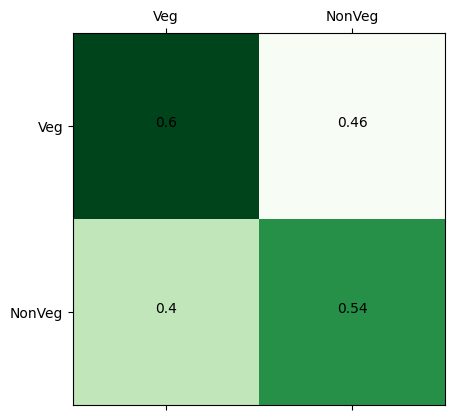

In [51]:
Ac = np.mean(ysp_ygh_lr[Y_test==0]==0)
Ar = np.mean(ysp_ygh_lr[Y_test==1]==1)

Mc = np.mean(ysp_ygh_lr[Y_test==0]==1)
Mr = np.mean(ysp_ygh_lr[Y_test==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

#9 Conclusion

The developed machine learning pipeline provides a feasible solution for classifying dishes based on dietary preferences. However, there is still room for improvement, and future work could explore advanced deep learning architectures or additional image processing techniques to enhance accuracy and robustness. The real-world applications of such models could impact dietary choices, offering users a tool to make more informed decisions when selecting meals.

We experimented with different models, including Linear SVM, Logistic Regression, and a Convolutional Neural Network (CNN). The features extracted included the Yellow Component, Gray Level Co-occurrence Matrix (GMLC) features, and Histogram of Oriented Gradients (HOG) features.

After thorough experimentation, the Logistic Regression model with a feature set consisting of one Yellow Component feature, two GMLC features, and four HOG features achieved the best results. The model demonstrated a training accuracy of approximately 56.7% and a test accuracy of 57.1%. Confusion matrix visualization further revealed insights into the model's performance, showcasing its ability to distinguish between veg and non-veg dishes.